<a href="https://colab.research.google.com/github/emanfj/Find-Your-Celebrity-Doppelganger/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Before running this block, make sure to upload "data.mat" in the google drive.

In [ ]:
# path of dataset from google drive
import scipy.io as sio
GOOGLE_COLAB = True
path = ""
if GOOGLE_COLAB:
    from google.colab import drive, files
    drive.mount('/content/drive/')
    path = "/content/drive/My Drive/"

dataset = path + "data.mat"

#Enter path of your test image
test_image=path+"id.jpg"
mat_contents = sio.loadmat(dataset)
mat_contents
images = mat_contents['images']
label = mat_contents['C']
images.shape

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


(50, 3072)

If you can see the shape of images in 'data.mat' then your data has been read.

In [ ]:
import numpy as np
images= np.transpose(images)
images.shape
im = np.reshape(images, [ 32, 32, 3, -1], order="F")

(32, 32, 3)


(32, 32, 3)

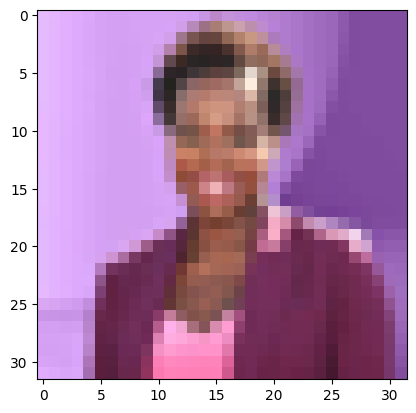

In [ ]:
from matplotlib import pyplot as plt

plt.imshow(im[:,:,:,30])
print(im[:,:,:,0].shape)
a= im[:,:,:,30]
plt.imshow(a)
a.shape

In [ ]:
from google.colab.patches import cv2_imshow

In [ ]:
from scipy import misc
import cv2
from math import sqrt
from numpy import ndarray

for i in range(50):
    G = im[:,:,:,i]
    G = np.reshape(G,[-1], order="F")

#Read your image here
test_img = cv2.imread(test_image, 1)
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

#Resize your image
test_img_resized = cv2.resize(test_img, (32, 32))

#Reshape your image as we reshape the image of dataset
# flattened to a 1D vector
test_img_reshaped = np.reshape(test_img_resized, [-1], order="F")


#Calculate Eucleadian distance between your image and dataset
def euclidean_distance(img1,img2):
  return np.sqrt(np.sum((img1-img2)**2))

min_distance=float('inf')
min_index=-1

The most resembling celebrity image is at index 24 with a distance of 517.9247049523705


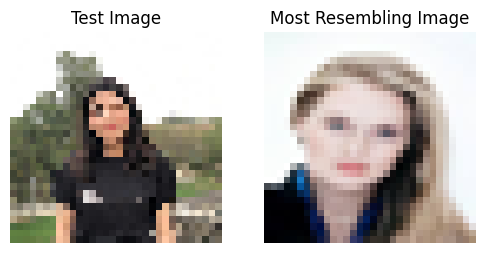

In [ ]:
#Find min distance
#Fine at which point min value exists


for i in range(50):
    # process dataset image
    G = im[:,:,:,i]
    G_reshaped = np.reshape(G, [-1], order="F")

    # calc euclidean distance
    distance = euclidean_distance(test_img_reshaped, G_reshaped)

    # update minimum distance and index
    if distance < min_distance:
        min_distance = distance
        min_index = i

print(f'The most resembling celebrity image is at index {min_index} with a distance of {min_distance}')
# display the most resembling image
most_resembling_img = im[:,:,:,min_index]

plt.figure(figsize=(6, 6))

# Display the test image
plt.subplot(1, 2, 1)
plt.imshow(test_img_resized)
plt.title('Test Image')
plt.axis('off')

# display the most resembling image
plt.subplot(1, 2, 2)
plt.imshow(most_resembling_img)
plt.title('Most Resembling Image')
plt.axis('off')

plt.show()

The 1 most resembling celebrity image is at index 24 with a distance of 517.9247049523705
The 2 most resembling celebrity image is at index 5 with a distance of 518.301070807306
The 3 most resembling celebrity image is at index 22 with a distance of 522.4203288540751


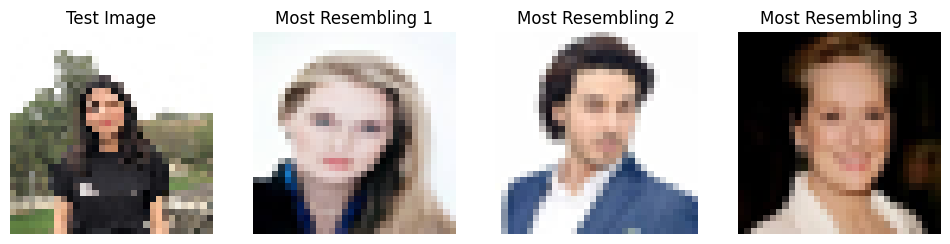

In [ ]:
#3 NN
#Find 3 min distances
#Find their instances

# initialize lists to store the three minimum distances and their corresponding indices
min_distances = [float('inf')] * 3
min_indices = [-1] * 3

for i in range(im.shape[3]):
    # Process dataset image
    G = im[:,:,:,i]
    G_reshaped = np.reshape(G, [-1], order="F")

    # Calculate Euclidean distance
    distance = euclidean_distance(test_img_reshaped, G_reshaped)

    # Check if the current distance is smaller than any of the three minimum distances
    for j in range(3):
        if distance < min_distances[j]:
            # Shift the current minimum distances and indices
            for k in range(2, j, -1):
                min_distances[k] = min_distances[k-1]
                min_indices[k] = min_indices[k-1]
            # Update the current minimum distance and index
            min_distances[j] = distance
            min_indices[j] = i
            break

# Print the results
for idx in range(3):
    print(f'The {idx+1} most resembling celebrity image is at index {min_indices[idx]} with a distance of {min_distances[idx]}')

# Display the test image and the three most resembling images
plt.figure(figsize=(12, 6))

# Display the test image
plt.subplot(1, 4, 1)
plt.imshow(test_img_resized)
plt.title('Test Image')
plt.axis('off')

# Display the three most resembling images
for idx in range(3):
    most_resembling_img = im[:,:,:,min_indices[idx]]
    plt.subplot(1, 4, idx + 2)
    plt.imshow(most_resembling_img)
    plt.title(f'Most Resembling {idx+1}')
    plt.axis('off')

plt.show()



The 1 most resembling celebrity image is at index 24 with a distance of 517.9247049523705
The 2 most resembling celebrity image is at index 5 with a distance of 518.301070807306
The 3 most resembling celebrity image is at index 22 with a distance of 522.4203288540751
The 4 most resembling celebrity image is at index 45 with a distance of 530.1565806438698
The 5 most resembling celebrity image is at index 29 with a distance of 533.6215887686704


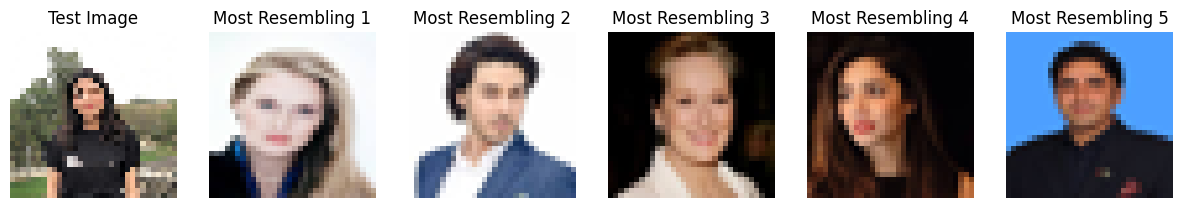

In [ ]:
#Find 5 min distances
#Find their instances

min_distances = [float('inf')] * 5
min_indices = [-1] * 5


for i in range(im.shape[3]):
    # Process dataset image
    G = im[:,:,:,i]
    G_reshaped = np.reshape(G, [-1], order="F")

    # Calculate Euclidean distance
    distance = euclidean_distance(test_img_reshaped, G_reshaped)

    # Check if the current distance is smaller than any of the five minimum distances
    for j in range(5):
        if distance < min_distances[j]:
            # Shift the current minimum distances and indices
            for k in range(4, j, -1):
                min_distances[k] = min_distances[k-1]
                min_indices[k] = min_indices[k-1]
            # Update the current minimum distance and index
            min_distances[j] = distance
            min_indices[j] = i
            break

# Print the results
for idx in range(5):
    print(f'The {idx+1} most resembling celebrity image is at index {min_indices[idx]} with a distance of {min_distances[idx]}')

# Display the test image and the five most resembling images
plt.figure(figsize=(15, 6))

# Display the test image
plt.subplot(1, 6, 1)
plt.imshow(test_img_resized)
plt.title('Test Image')
plt.axis('off')

# Display the five most resembling images
for idx in range(5):
    most_resembling_img = im[:,:,:,min_indices[idx]]
    plt.subplot(1, 6, idx + 2)
    plt.imshow(most_resembling_img)
    plt.title(f'Most Resembling {idx+1}')
    plt.axis('off')

plt.show()
